
=== First 5 Rows of Dataset ===
   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
1       2  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
2       3  CA-2017-138688  12/06/2017  16/06/2017    Second Class    DV-13045   
3       4  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   
4       5  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Re

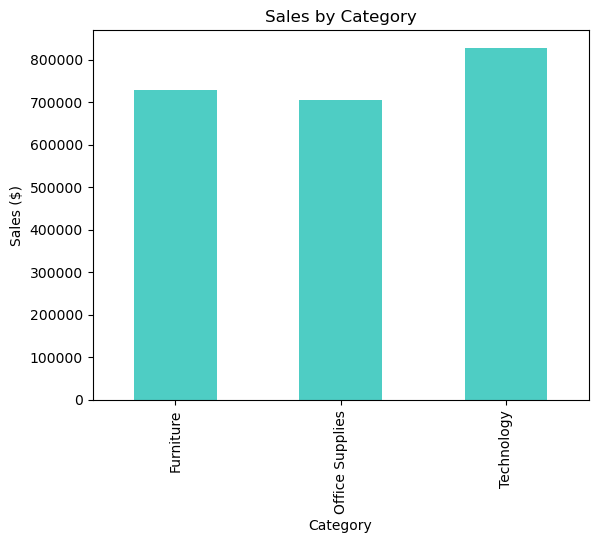

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('train.csv')

print("\n=== First 5 Rows of Dataset ===")
print(df.head())

print("\n=== Data Types of Columns ===")
print(df.dtypes)

print("\n=== Missing Values in Each Column ===")
print(df.isnull().sum())

print("\n=== Numbers of Duplicate Rows ===")
print(df.duplicated().sum())

df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%y', errors='coerce')
df = df.dropna(subset=['Sales'])
df = df.drop_duplicates()

print("\n=== Total Sales by Category ===")
sales_by_category = df.groupby('Category')['Sales'].sum()
print(sales_by_category)

print("\n===Average Sales per Order ===")
avg_sales = np.mean(df['Sales'])
print(f"Average Sales per Order: ${avg_sales:.2f}")

sales_by_category.plot(kind='bar', color='#4ECDC4')
plt.title('Sales by Category')
plt.ylabel('Sales ($)')
plt.savefig('sales_by_category.png')
plt.show()
